# exploratory data analysis ( eda )

In [61]:
import pandas as pd

from google.colab import drive
drive.mount("/content/gdrive")

# read in data as pandas dataframe
df = pd.read_csv("/content/gdrive/MyDrive/data/diamonds.csv")

display(df[:4])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


# data summary

In [40]:
print(f"The dataset represents key features for {len(df)} diamonds.")
print(f"features: {', '.join(df.columns[1:])}")
print(f"cuts: {', '.join(df.cut.unique())}")
print(f"colors: {', '.join(df.color.unique())}")
print(f"clarities: {', '.join(df.clarity.unique())}")

The dataset represents key features for 53940 diamonds.
features: carat, cut, color, clarity, depth, table, price, x, y, z
cuts: Ideal, Premium, Good, Very Good, Fair
colors: E, I, J, H, F, G, D
clarities: SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF


## data transformation ( tidy )

In [94]:
# gather ( melt ) data
diamonds = pd.melt(
    frame=df,
    value_vars=["x", "y", "z"],
    id_vars=["carat", "cut", "color", "clarity", "depth", "table", "price"],
    var_name="measurement"
    )

display(diamonds[:4])

,carat,cut,color,clarity,depth,table,price,measurement,value
0,0.23,Ideal,E,SI2,61.5,55.0,326,x,3.95
1,0.21,Premium,E,SI1,59.8,61.0,326,x,3.89
2,0.23,Good,E,VS1,56.9,65.0,327,x,4.05
3,0.29,Premium,I,VS2,62.4,58.0,334,x,4.20


## data visualization

#### ( theme_538 )

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


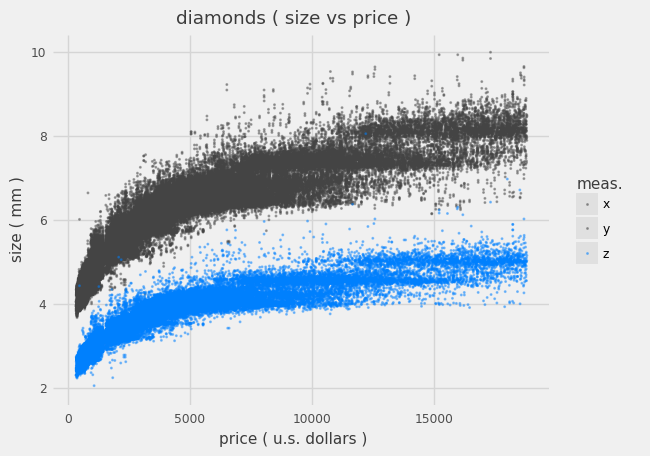

<ggplot: (8746642142434)>

In [58]:
from plotnine.scales.scale_manual import scale_color_manual
from plotnine.qplot import labs
from plotnine.scales.limits import lims
from plotnine import ggplot, aes, geom_point
from plotnine.themes import theme_538 as theme

p = (ggplot(diamonds)
    + aes(x="price", y="value", color="measurement")
    + geom_point(size=0.2, alpha=0.4)
    + lims(y=(2, 10))
    + labs(title="diamonds ( size vs price )", x="price ( u.s. dollars )", y="size ( mm )", color="meas.")
    + scale_color_manual(values=["#444", "#444", "#0080ff"])
    + theme()
    )
p

#### ( theme_tufte )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


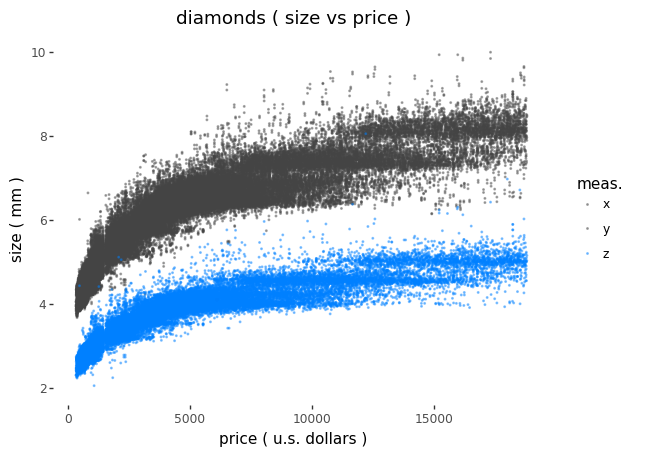

<ggplot: (8746614109106)>

In [68]:
from plotnine.themes import theme_tufte as theme
p + theme()

#### ( theme_grey )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


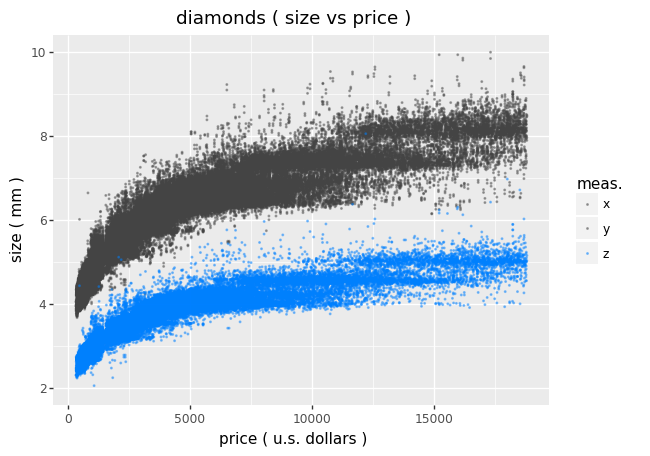

<ggplot: (8746641561823)>

In [73]:
from plotnine.themes import theme_grey as theme
p + theme()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


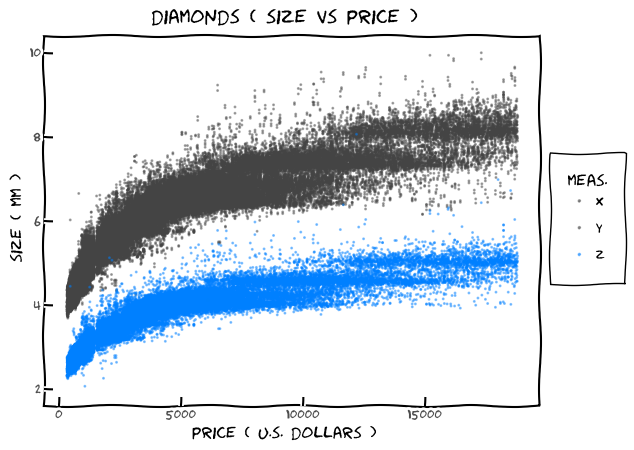

<ggplot: (8746642367062)>

In [74]:
from plotnine.themes import theme_xkcd as theme
p + theme()

## save output

In [59]:
p.save(filename="/content/gdrive/MyDrive/data/figure_one.png", height=6, width=8, units="in", dpi=300)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /content/gdrive/MyDrive/data/figure_one.png
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


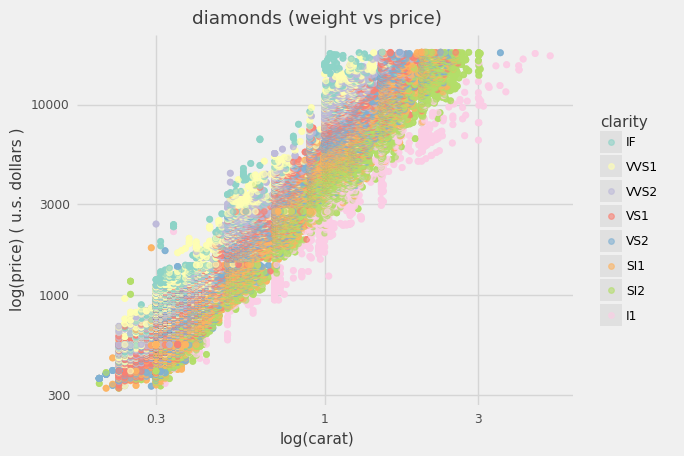

<ggplot: (8746624721677)>

In [156]:
from plotnine.scales.scale_xy import scale_x_log10, scale_y_log10
from plotnine.scales import scale_fill_brewer, scale_color_brewer
from plotnine.themes import theme_538

clarity_list = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]

p = (ggplot(diamonds)
    + aes(x="carat", y="price", color="clarity", fill="clarity")
    + geom_point(size=1.8, alpha=0.6)
    + scale_x_log10()
    + scale_y_log10()
    + labs(title="diamonds (weight vs price)", y="log(price) ( u.s. dollars )", x="log(carat)")
    + scale_fill_brewer(type="qual", palette="Set3", limits=clarity_list)
    + scale_color_brewer(type="qual", palette="Set3", limits=clarity_list)
    + theme_538()
    )
p

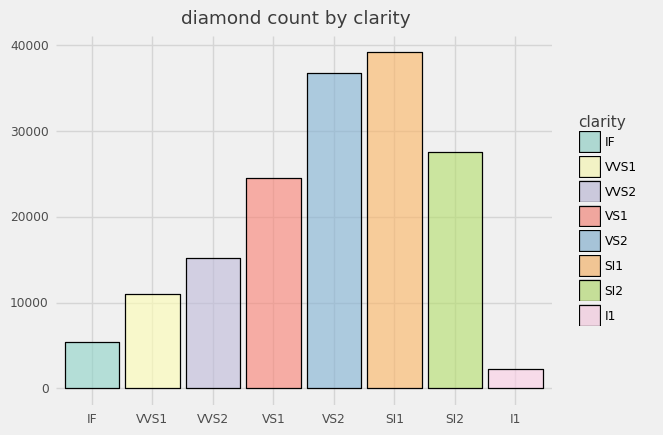

<ggplot: (8746639791633)>

In [181]:
from plotnine import geom_bar

p = (ggplot(diamonds)
    + aes(x="clarity", fill="clarity")
    + geom_bar(alpha=0.6, color="#000")
    + scale_x_discrete(limits=clarity_list)
    + scale_fill_brewer(type="qual", palette="Set3", limits=clarity_list)
    + labs(title="diamond count by clarity", x="", y="")
    + theme_538()
    )
p

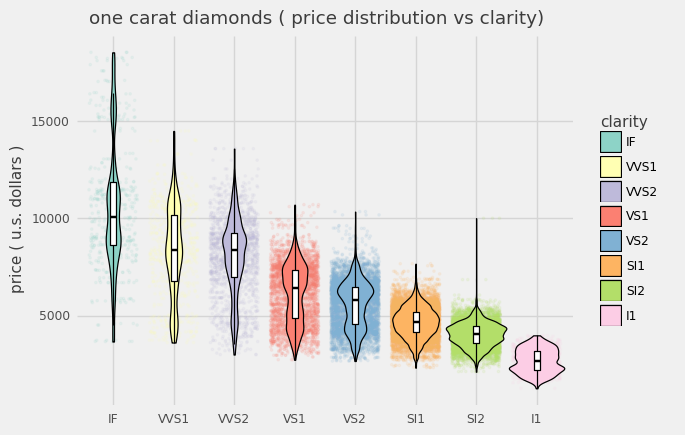

<ggplot: (8746608227680)>

In [208]:
from plotnine import geom_violin, geom_boxplot, geom_jitter

one_carat_diamonds = diamonds.query("carat >= 0.9 and carat <= 1.1")

p = (ggplot(one_carat_diamonds)
    + aes(x="clarity", y="price", fill="clarity")
    + geom_jitter(aes(color="clarity"), size=0.5, alpha=0.1)
    + geom_violin(color="#000", width=1)
    + geom_boxplot(color="#000", fill="#fff", width=0.1, outlier_shape="")
    + scale_x_discrete(limits=clarity_list)
    + scale_fill_brewer(type="qual", palette="Set3", limits=clarity_list)
    + scale_color_brewer(type="qual", palette="Set3", limits=clarity_list)
    + labs(title="one carat diamonds ( price distribution vs clarity)", x="", y="price ( u.s. dollars )")
    + theme_538()
    )
p